<a href="https://colab.research.google.com/github/Deri-Nugroho/Intensive-Camp-Machine-Learning-2/blob/main/DIMENSIONALITY_REDUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Dimensionality Reduction

### Apa itu Dimensionality Reduction?
Dimensionality Reduction adalah teknik dalam machine learning untuk mengurangi jumlah fitur (dimensi) dalam dataset sambil mempertahankan sebanyak mungkin informasi penting.

### Mengapa Perlu Dimensionality Reduction?
*   Menghindari Curse of Dimensionality: Terlalu banyak fitur bisa menyebabkan model overfitting dan lambat.

*   Menghapus Redundansi: Banyak fitur bisa saling berkorelasi atau tidak relevan.

*   Visualisasi Lebih Mudah: Data berdimensi tinggi dapat divisualisasikan dalam 2D/3D.

*   Percepat Komputasi: Model lebih cepat dilatih dan diuji.




### Tipe Dimensionality Reduction
A. Feature Selection
*   Memilih subset fitur yang paling relevan.

*   Contoh: SelectKBest, Recursive Feature Elimination (RFE).

B. Feature Extraction (Transformasi)
*   Membuat fitur baru berdasarkan kombinasi fitur asli.

*   Contoh: PCA, t-SNE, LDA, Autoencoder.




### Principal Component Analysis (PCA)
PCA adalah teknik statistik yang paling umum untuk dimensionality reduction.

Cara Kerja PCA:

1. Normalisasi data.

2. Hitung covariance matrix.

3. Hitung eigenvector dan eigenvalue.

4. Pilih komponen utama (principal components) berdasarkan eigenvalue terbesar.

5. Proyeksikan data ke dimensi baru.

Accuracy Decision Tree: 0.9666666666666667
Explained Variance Ratio: [0.92848323 0.04764372 0.01931005 0.004563  ]


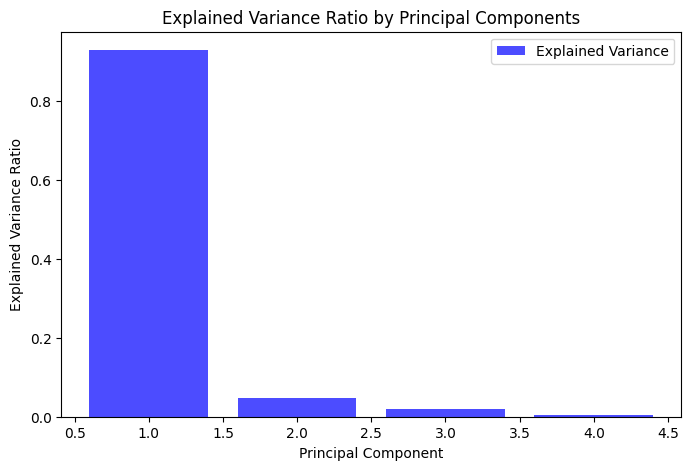

Accuracy Decision Tree with PCA (2 components): 0.9333333333333333


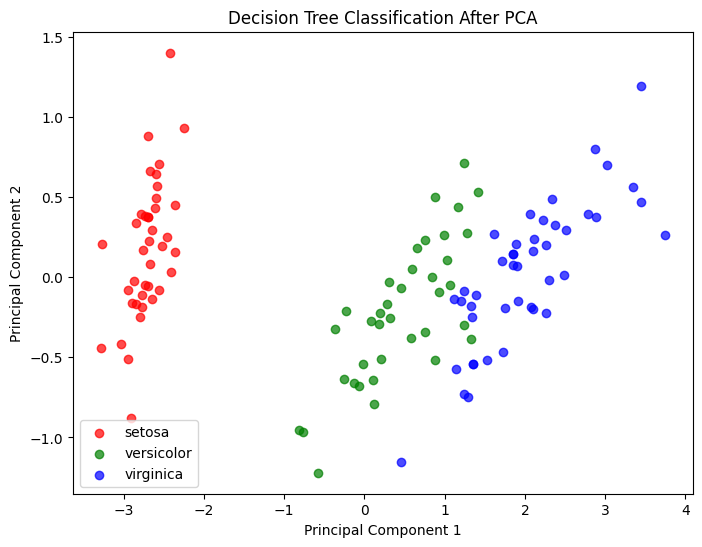

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Tahap 1: Memuat Dataset
# Menggunakan dataset Iris yang terdiri dari tiga jenis bunga iris
iris = datasets.load_iris()
atribut = iris.data  # Menyimpan fitur (panjang dan lebar sepal & petal)
label = iris.target  # Menyimpan label/kelas (setosa, versicolor, virginica)

# Tahap 2: Membagi Data
# Memisahkan dataset menjadi training set (80%) dan testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2, random_state=1)

# Tahap 3: Membuat Model Decision Tree
# Decision Tree digunakan untuk mengklasifikasikan data berdasarkan fitur tertentu
decision_tree = tree.DecisionTreeClassifier()

# Melatih model dengan data training
model_pertama = decision_tree.fit(X_train, y_train)

# Mengukur akurasi model dengan data testing
accuracy = model_pertama.score(X_test, y_test)
print(f'Accuracy Decision Tree: {accuracy}')

# Tahap 4: Menggunakan PCA untuk Reduksi Dimensi
# PCA digunakan untuk mengurangi jumlah fitur sambil mempertahankan informasi utama
pca = PCA(n_components=4)  # Menggunakan 4 principal components

# Menerapkan PCA pada dataset training untuk mendapatkan fitur baru
pca_attributes = pca.fit_transform(X_train)

# Menampilkan proporsi varians yang dijelaskan oleh masing-masing principal component
variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {variance_ratio}')

# Visualisasi Explained Variance Ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), variance_ratio, alpha=0.7, color='b', label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.show()

# Tahap 5: PCA dengan 2 Principal Components
# Mengurangi dimensi dataset menjadi hanya 2 komponen utama
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

# Tahap 6: Melatih Model dengan Data PCA
# Melatih kembali Decision Tree dengan data hasil PCA
model2 = decision_tree.fit(X_train_pca, y_train)

# Mengukur akurasi model setelah reduksi dimensi
accuracy_pca = model2.score(X_test_pca, y_test)
print(f'Accuracy Decision Tree with PCA (2 components): {accuracy_pca}')

# Visualisasi hasil klasifikasi setelah PCA
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                label=target_name, color=colors[i], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Tree Classification After PCA')
plt.legend()
plt.show()

# Kesimpulan:
# - Decision Tree digunakan untuk membuat model klasifikasi
# - PCA diterapkan untuk melihat seberapa besar reduksi dimensi bisa dilakukan
# - Model diuji kembali dengan hanya 2 principal components untuk melihat dampaknya
# - Visualisasi menunjukkan bagaimana data terklasifikasi berdasarkan dua principal components